<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Gestión de Outliers

AutoRenew, la empresa líder en la venta de coches de segunda mano, sigue adelante con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Este modelo es clave para mejorar las estrategias de ventas, marketing y optimización del inventario de la empresa. Ya has realizado un análisis exploratorio inicial y gestionado los valores nulos en el conjunto de datos. Ahora, es el momento de abordar otro aspecto crucial del preprocesamiento: la **gestión de outliers**.

En este laboratorio, te enfocarás en identificar y gestionar los outliers (valores atípicos) presentes en el conjunto de datos. Los outliers pueden distorsionar los resultados de un análisis y afectar negativamente el rendimiento de los modelos predictivos, por lo que es fundamental tratarlos adecuadamente antes de proceder con las siguientes fases del proyecto.


**Instrucciones:**

1. **Identificación de Outliers:** Explora las columnas clave del conjunto de datos (como `price`, `powerCV`, `kilometer`, etc.) para identificar posibles outliers. Utiliza gráficos como diagramas de caja (boxplots) y análisis estadísticos para detectar valores que se desvíen significativamente del resto de los datos.

2. **Análisis de Outliers:** Una vez identificados, analiza los outliers para determinar si son errores de datos, valores extremos válidos o resultados de condiciones específicas que deben ser tenidos en cuenta. Considera el contexto de cada columna al evaluar la relevancia de estos valores atípicos.

3. **Gestión de Outliers:** Decide la estrategia más adecuada para manejar los outliers. Esto podría incluir la eliminación de los outliers, la transformación de los datos, o la aplicación de técnicas de imputación. Justifica tu elección basándote en cómo los outliers podrían afectar el modelo predictivo.

**Nota:** Recuerda que este laboratorio es parte de una serie de actividades en las que utilizarás el mismo conjunto de datos a lo largo de la semana. Documenta cuidadosamente los pasos que sigas para que puedas referirte a ellos en las próximas etapas del proyecto.


In [94]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon

# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product, combinations

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

from src import soporte_preprocesamiento as sp

In [50]:
df = pd.read_csv("datos/df_estandarizado.csv", index_col=0)

In [51]:
df["monthOfRegistration"] = df["monthOfRegistration"].astype(object)

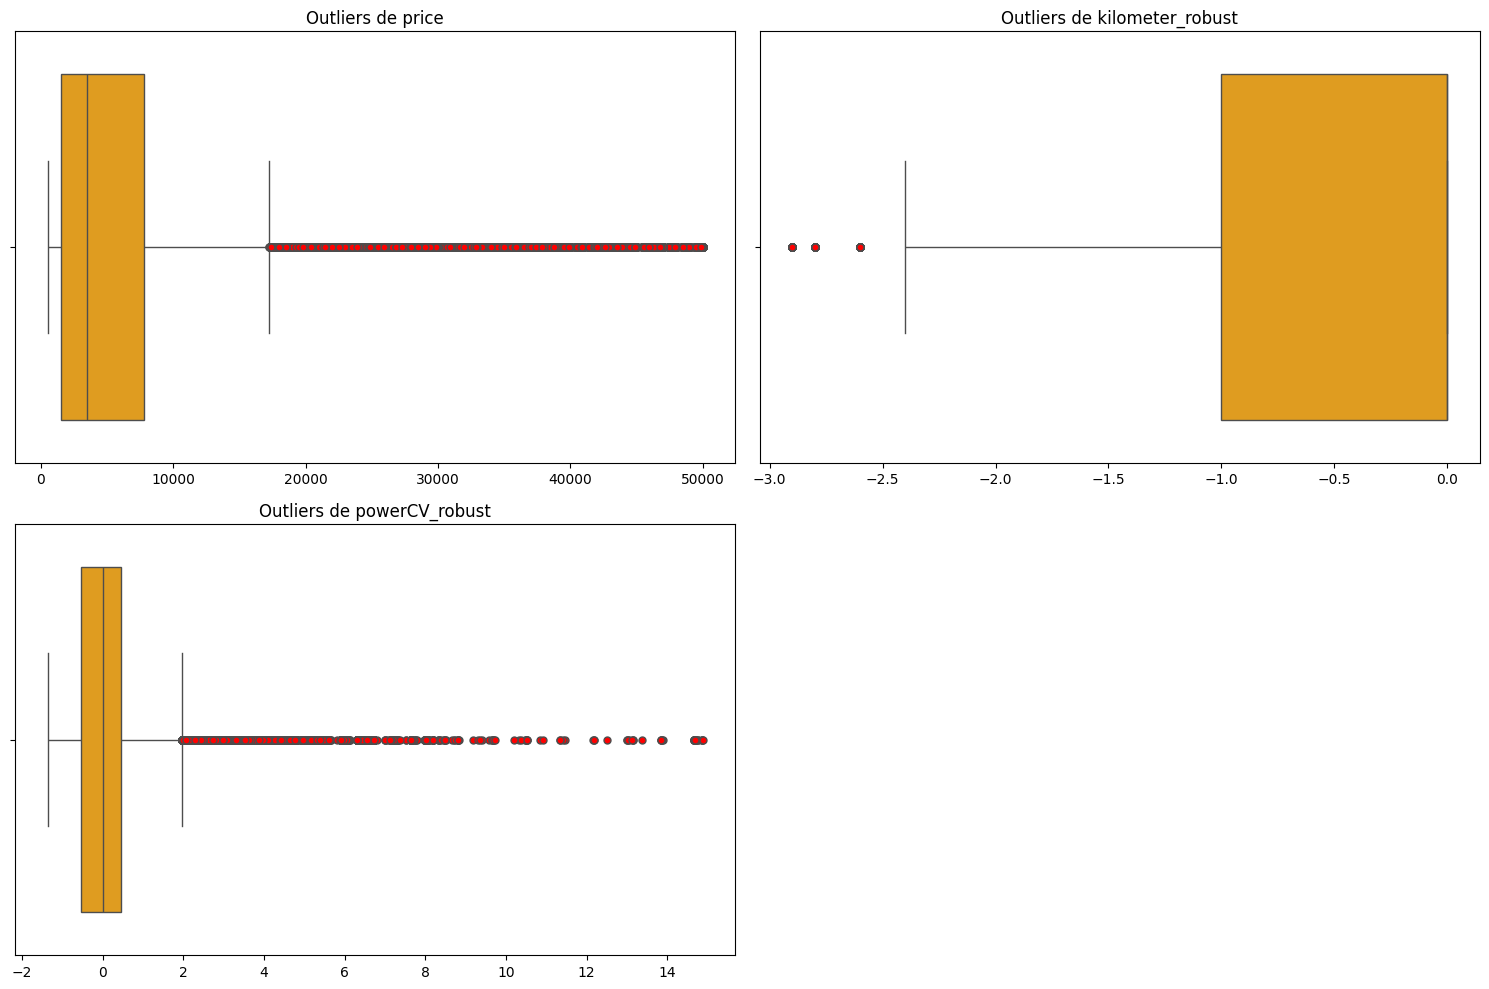

In [52]:
sp.detectar_outliers(df)

Para gestionar los nulos, usaremos el Local Outlier Factor, debido a que tenemos datos muy similares y muy variados.

100%|██████████| 9/9 [00:58<00:00,  6.50s/it]


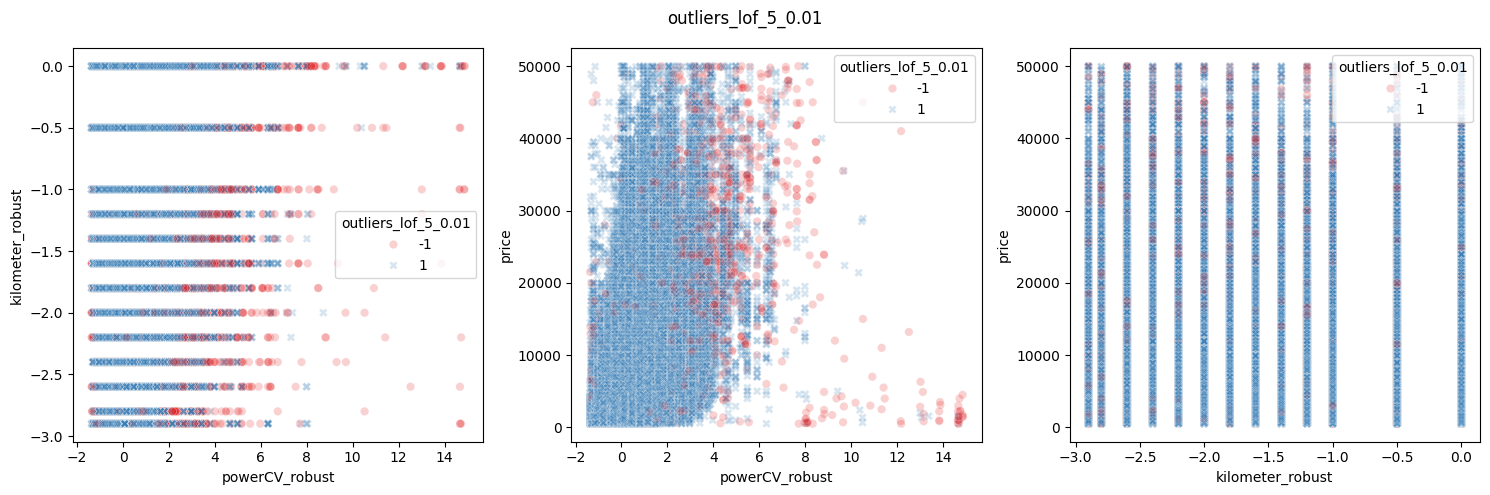

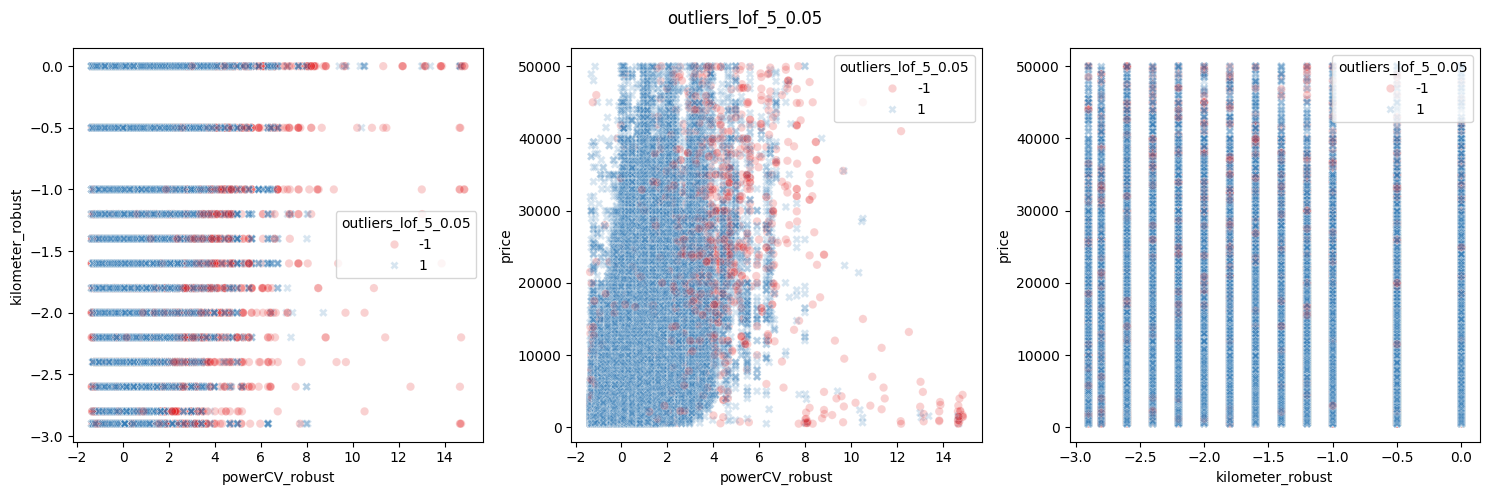

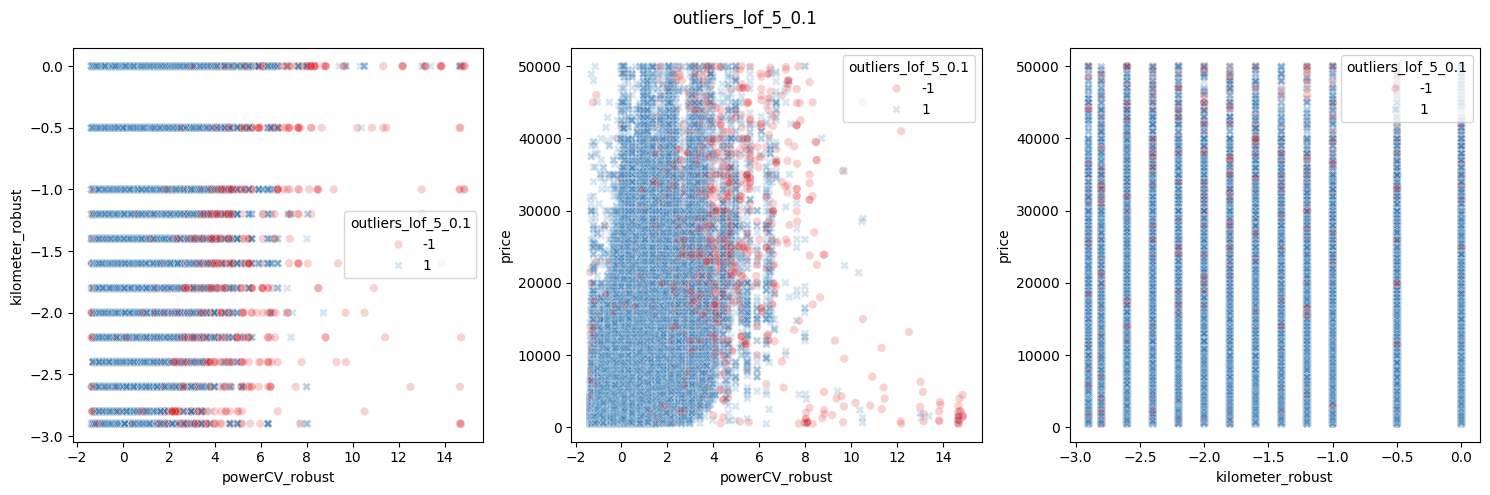

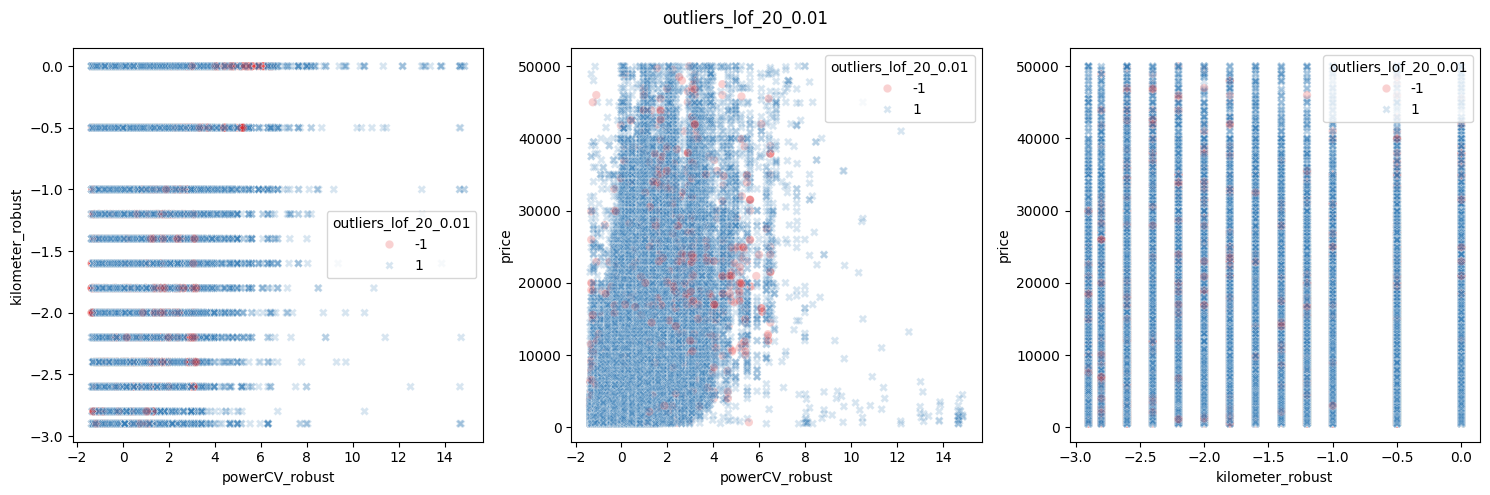

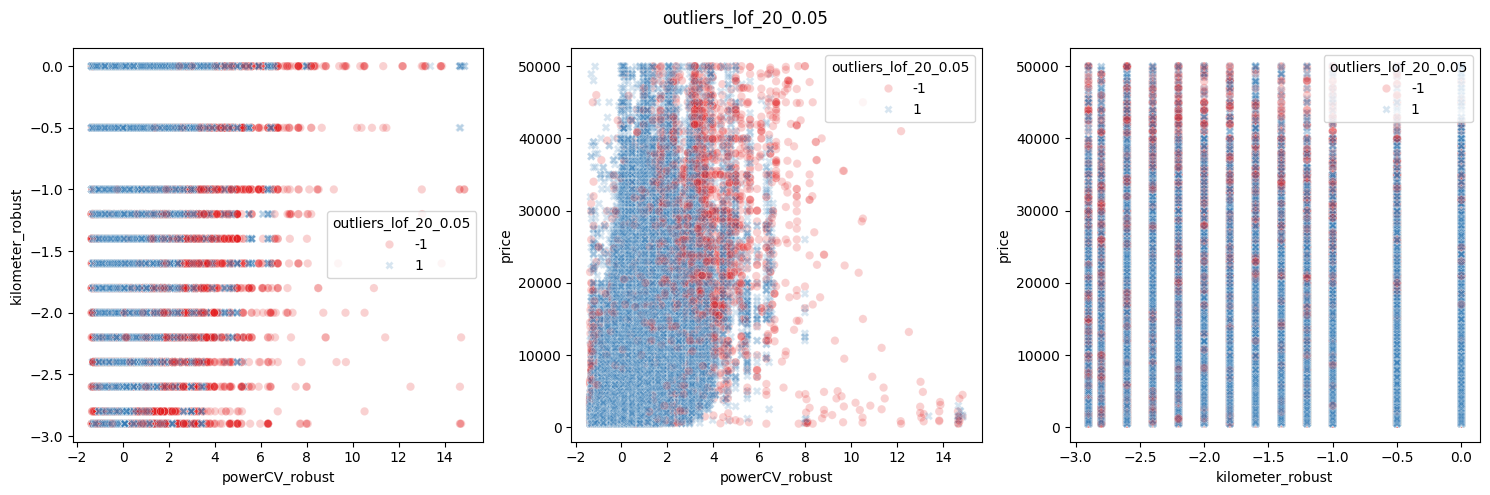

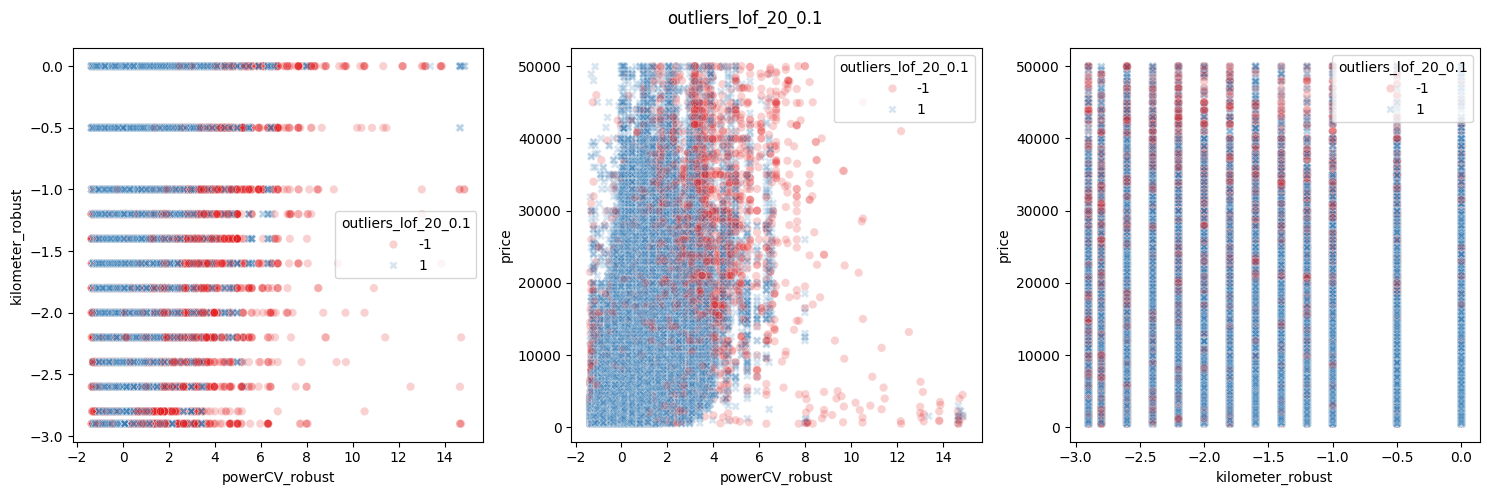

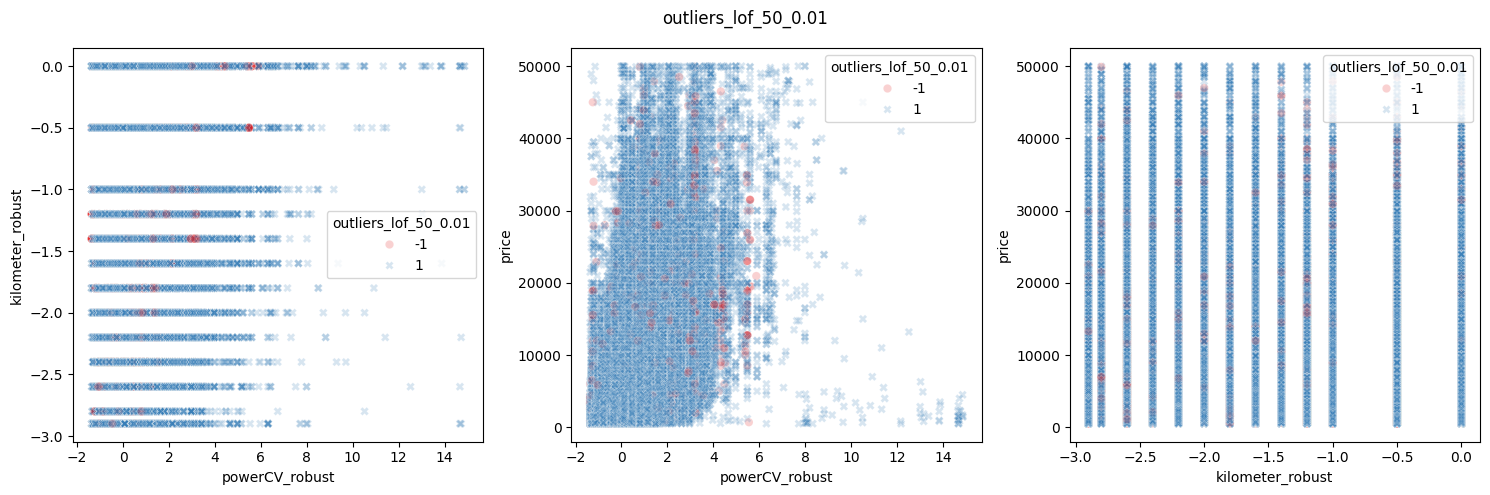

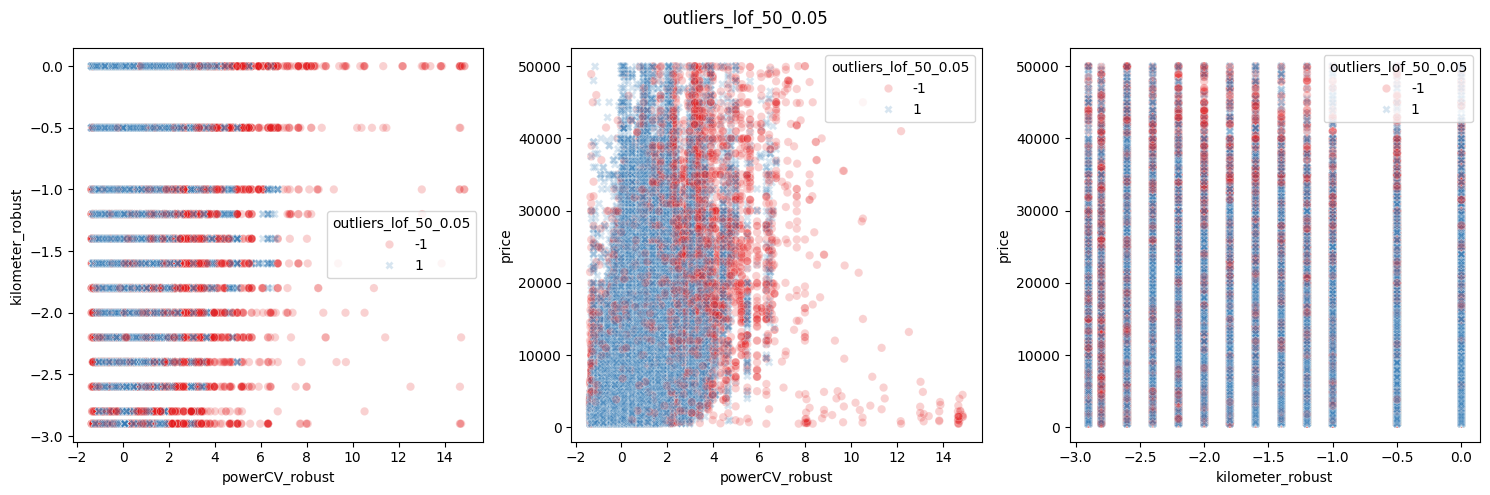

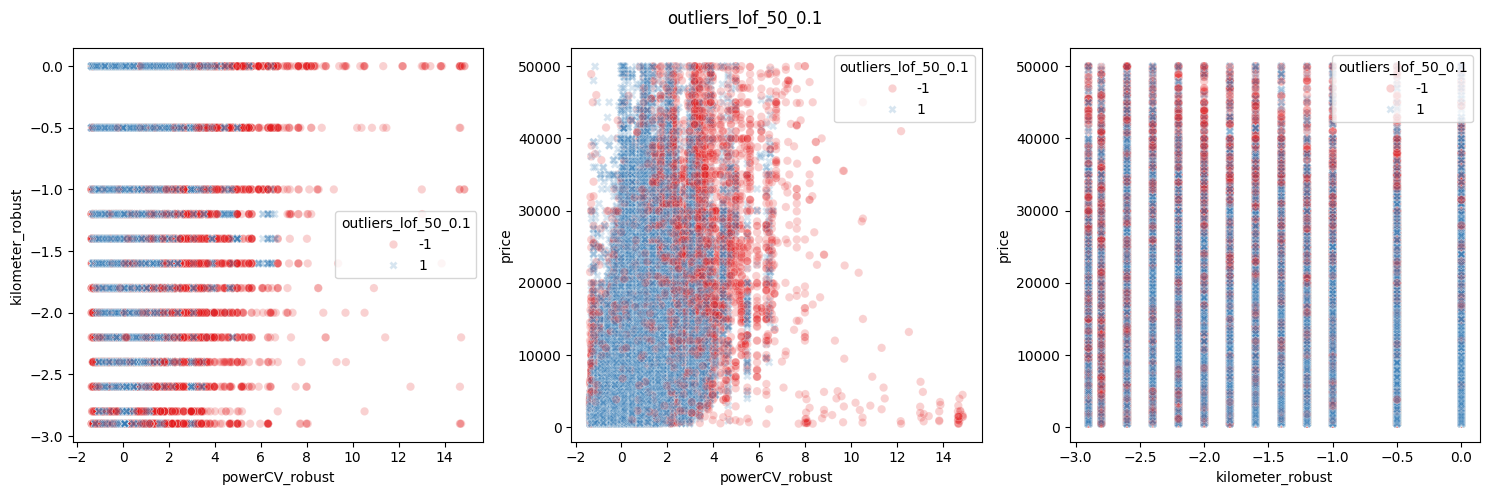

In [ ]:
def gestion_nulos_lof(df, col_numericas, list_neighbors, lista_contaminacion):
    
    combinaciones = list(product(list_neighbors, lista_contaminacion))
    
    for neighbors, contaminacion in tqdm(combinaciones):
        lof = LocalOutlierFactor(n_neighbors=neighbors, 
                                 contamination=contaminacion,
                                 n_jobs=-1)
        df[f"outliers_lof_{neighbors}_{contaminacion}"] = lof.fit_predict(df[col_numericas])

    return df

col_numericas=['powerCV_robust', 'kilometer_robust']
lista_vecinos=[5, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

combinaciones_variables = list(combinations(['powerCV_robust', 'kilometer_robust', 'price'], 2))
columnas_hue = df_lof.filter(like="outlier").columns

for col_hue in columnas_hue:
    fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
    axes = axes.flat

    for indice, tupla in enumerate(combinaciones_variables):
        sns.scatterplot(df_lof, x=tupla[0], y=tupla[1], ax=axes[indice], hue = col_hue, palette="Set1", style=col_hue, alpha=0.2)
        plt.suptitle(f"{col_hue}")
        plt.tight_layout()

In [95]:
df_lof

dateCrawled                                               name  \
0          2016-03                               A5_Sportback_2.7_Tdi   
1          2016-03                     Jeep_Grand_Cherokee_"Overland"   
2          2016-03                                 GOLF_4_1_4__3TÜRER   
3          2016-03                     Skoda_Fabia_1.4_TDI_PD_Classic   
4          2016-04  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...   
...            ...                                                ...   
330611     2016-03                         Suche_t4___vito_ab_6_sitze   
330612     2016-03              Smart_smart_leistungssteigerung_100ps   
330613     2016-03                 Volkswagen_Multivan_T4_TDI_7DC_UY2   
330614     2016-03                             VW_Golf_Kombi_1_9l_TDI   
330615     2016-03       BMW_M135i_vollausgestattet_NP_52.720____Euro   

         seller offerType    price   abtest      vehicleType  \
0       private     offer  18300.0     test            coupe   
1       private     offer   9800.0     test              suv   
2       private     offer   1500.0     test        small car   
3       private     offer   3600.0     test        small car   
4       private     offer    650.0     test  Sin informacion   
...         ...       ...      ...      ...              ...   
330611  private     offer   2200.0     test  Sin informacion   
330612  private     offer   1199.0     test      convertible   
330613  private     offer   9200.0     test              bus   
330614  private     offer   3400.0     test            combi   
330615  private     offer  28990.0  control  Sin informacion   

       yearOfRegistration          gearbox            model  \
0                 Moderno         manually  Sin informacion   
1                 Moderno        automatic            grand   
2                 Moderno         manually             golf   
3                 Moderno         manually            fabia   
4                 Clásico         manually              3er   
...                   ...              ...              ...   
330611            Moderno  Sin informacion  Sin informacion   
330612            Moderno        automatic           fortwo   
330613            Clásico         manually      transporter   
330614            Moderno         manually             golf   
330615            Moderno         manually          m_reihe   

        monthOfRegistration         fuelType           brand  \
0                       5.0           diesel            audi   
1                       8.0           diesel            jeep   
2                       6.0           petrol      volkswagen   
3                       7.0           diesel           skoda   
4                      10.0           petrol             bmw   
...                     ...              ...             ...   
330611                  1.0  Sin informacion  sonstige_autos   
330612                  3.0           petrol           smart   
330613                  3.0           diesel      volkswagen   
330614                  6.0           diesel      volkswagen   
330615                  8.0           petrol             bmw   

       notRepairedDamage dateCreated lastSeen  kilometer_robust  \
0                    yes     2016-03  2016-04              -0.5   
1        Sin informacion     2016-03  2016-04              -0.5   
2                     no     2016-03  2016-03               0.0   
3                     no     2016-03  2016-04              -1.2   
4                    yes     2016-04  2016-04               0.0   
...                  ...         ...      ...               ...   
330611   Sin informacion     2016-03  2016-04              -2.6   
330612                no     2016-03  2016-03              -0.5   
330613                no     2016-03  2016-04               0.0   
330614   Sin informacion     2016-03  2016-03               0.0   
330615                no     2016-03  2016-03              -2.0   

        powerCV_robust  outlie

Consideraremos outliers aquellas filas que contengan más de 60% de nulos, en este caso, si tenemos 9 columnas de outliers, que serían 5/9.

In [ ]:
cantidad = 5
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]

In [96]:
df_filtrado

dateCrawled                                               name  \
88         2016-03          Hyundai_Genesis_Coupe_GT_3.8_V6_Automatik   
135        2016-03              Kia_Sorento__coole_Farbe_schaut......   
162        2016-03                             Ford_Mustang_V8_390cui   
241        2016-03                      Renault_Clio_III_Sport_RS_201   
255        2016-03                                       Ford_Mustang   
...            ...                                                ...   
330147     2016-03                     Audi_TT_RS_plus_Coupe_S_tronic   
330321     2016-03                 Mercedes_Benz_CLS_55_AMG_Automatik   
330461     2016-03  Opel_GT_gesucht_guter_Zutsand_unfallfrei_!_bis...   
330477     2016-04    Mazda_CX_5_SKYACTIV_D_175_Drive_AWD_Sports_Line   
330577     2016-03            Opel_vectra_c_mit_diblas_komplett_umbau   

         seller offerType    price   abtest vehicleType yearOfRegistration  \
88      private     offer  22999.0  control       coupe            Moderno   
135     private     offer   7500.0     test         suv            Moderno   
162     private     offer  25000.0  control       coupe            Antiguo   
241     private     offer   8400.0  control   small car            Moderno   
255     private     offer  18700.0     test       coupe            Moderno   
...         ...       ...      ...      ...         ...                ...   
330147  private     offer  39900.0  control       coupe            Moderno   
330321  private     offer  20000.0  control       coupe            Moderno   
330461  private     offer  14000.0  control       coupe            Moderno   
330477  private     offer  32900.0     test         suv           Reciente   
330577  private     offer   2999.0     test       combi            Moderno   

          gearbox     model  monthOfRegistration         fuelType  \
88      automatic    andere                  4.0           petrol   
135     automatic   sorento                 11.0           petrol   
162     automatic   mustang                 11.0           petrol   
241      manually      clio                  6.0           petrol   
255     automatic   mustang                  8.0           petrol   
...           ...       ...                  ...              ...   
330147  automatic        tt                  3.0           petrol   
330321  automatic    andere                  7.0           petrol   
330461   manually    andere                  6.0           petrol   
330477  automatic  cx_reihe                  9.0           diesel   
330577   manually    vectra                  1.0  Sin informacion   

                brand notRepairedDamage dateCreated lastSeen  \
88            hyundai                no     2016-03  2016-04   
135               kia   Sin informacion     2016-03  2016-04   
162              ford                no     2016-03  2016-04   
241           renault                no     2016-03  2016-03   
255              ford                no     2016-03  2016-04   
...               ...               ...         ...      ...   
330147           audi                no     2016-03  2016-03   
330321  mercedes_benz                no     2016-03  2016-03   
330461           opel                no     2016-03  2016-04   
330477          mazda                no     2016-04  2016-04   
330577           opel   Sin informacion     2016-03  2016-03   

        kilometer_robust  powerCV_robust  outliers_lof_5_0.01  \
88                  -2.0        3.023652                   -1   
135                 -2.9        1.193143                   -1   
162                 -1.2        3.057550                    1   
241                 -1.6        1.311787                   -1   
255                 -1.4        1.515177                   -1   
...                  ...             ...                  ...   
330147              -2.4        3.972804                   -1   
330321              -0.5        5.905007                   -1   
330461    

In [98]:
df_lof.describe()

price  monthOfRegistration  kilometer_robust  powerCV_robust  \
count  330616.000000        330616.000000     330616.000000   330616.000000   
mean     5972.944507             6.143650         -0.488608        0.097080   
std      6770.233746             3.339515          0.786917        0.967077   
min       500.000000             1.000000         -2.900000       -1.366179   
25%      1500.000000             3.000000         -1.000000       -0.535670   
50%      3499.000000             6.000000          0.000000        0.000000   
75%      7800.000000             9.000000          0.000000        0.464330   
max     50000.000000            12.000000          0.000000       14.871109   

       outliers_lof_5_0.01  outliers_lof_5_0.05  outliers_lof_5_0.1  \
count        330616.000000        330616.000000       330616.000000   
mean              0.983842             0.983842            0.983842   
std               0.179038             0.179038            0.179038   
min              -1.000000            -1.000000           -1.000000   
25%               1.000000             1.000000            1.000000   
50%               1.000000             1.000000            1.000000   
75%               1.000000             1.000000            1.000000   
max               1.000000             1.000000            1.000000   

       outliers_lof_20_0.01  outliers_lof_20_0.05  outliers_lof_20_0.1  \
count         330616.000000         330616.000000        330616.000000   
mean               0.980201              0.944389             0.944389   
std                0.198007              0.328832             0.328832   
min               -1.000000             -1.000000            -1.000000   
25%                1.000000              1.000000             1.000000   
50%                1.000000              1.000000             1.000000   
75%                1.000000              1.000000             1.000000   
max                1.000000              1.000000             1.000000   

       outliers_lof_50_0.01  outliers_lof_50_0.05  outliers_lof_50_0.1  
count         330616.000000         330616.000000        330616.000000  
mean               0.980031              0.900120             0.889993  
std                0.198844              0.435643             0.455974  
min               -1.000000             -1.000000            -1.000000  
25%                1.000000              1.000000             1.000000  
50%                1.000000              1.000000             1.000000  
75%                1.000000              1.000000             1.000000  
max                1.000000              1.000000             1.000000

In [85]:
3561/df.shape[0]*100

1.0770803590872795

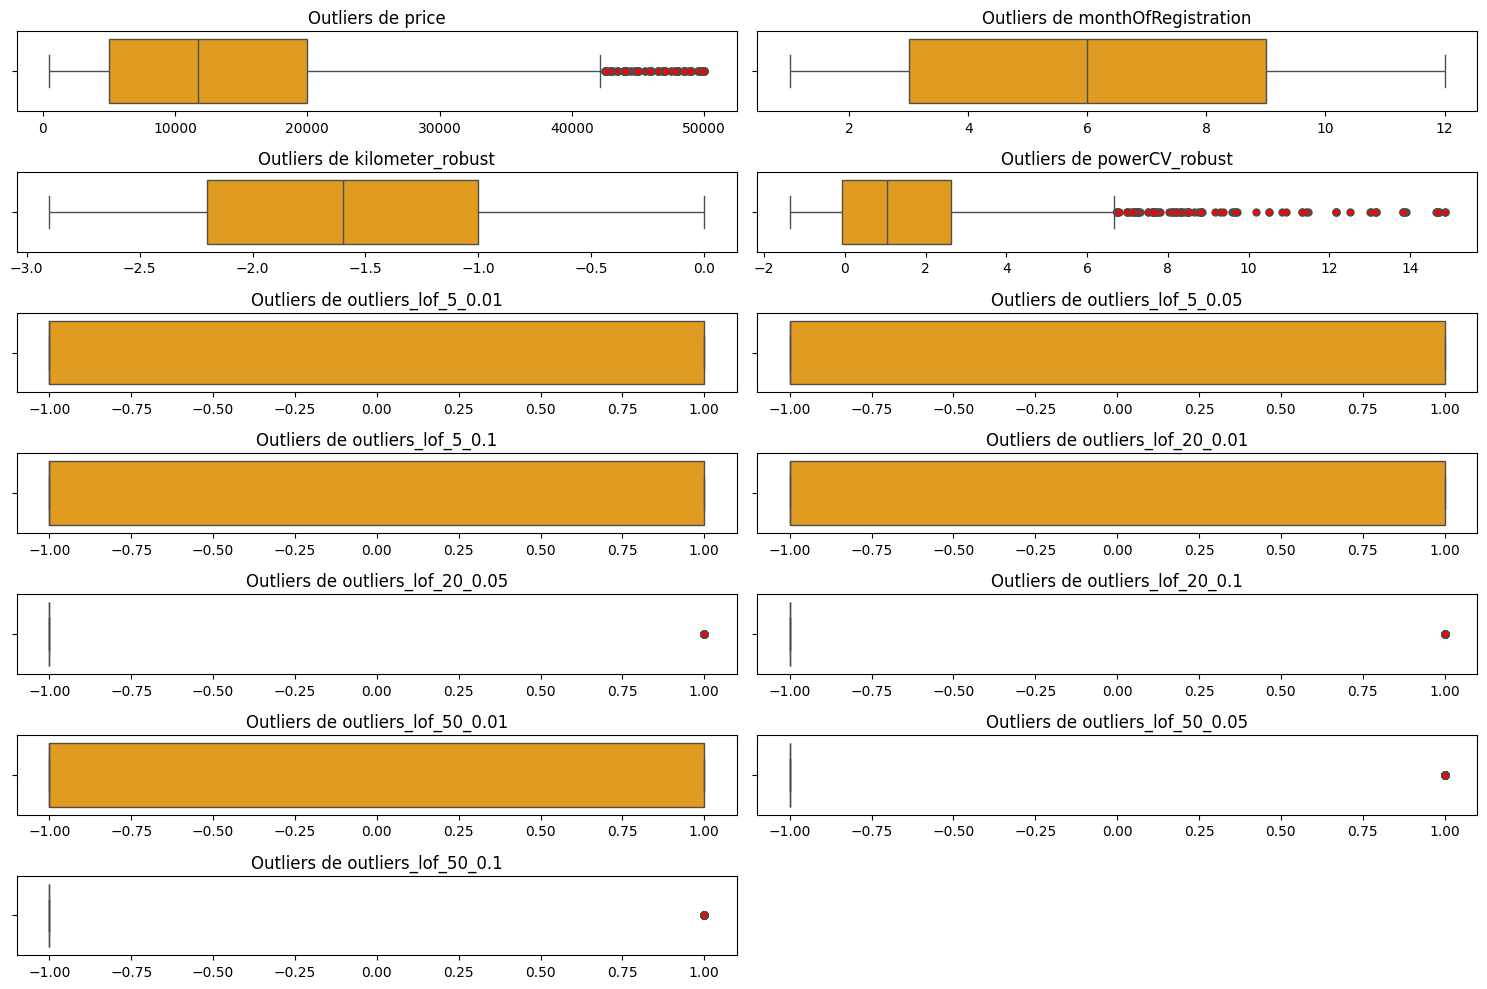

In [86]:
sp.detectar_outliers(df_filtrado)

In [103]:
df_filtrado.describe()

price  monthOfRegistration  kilometer_robust  powerCV_robust  \
count   3561.000000          3561.000000            3561.0    3.561000e+03   
mean   14116.299354             6.059815               1.6    1.040601e+00   
std    11359.114797             3.260086               0.0    4.441516e-16   
min      500.000000             1.000000               1.6    1.040601e+00   
25%     4999.000000             3.000000               1.6    1.040601e+00   
50%    11700.000000             6.000000               1.6    1.040601e+00   
75%    19999.000000             9.000000               1.6    1.040601e+00   
max    50000.000000            12.000000               1.6    1.040601e+00   

       outliers_lof_5_0.01  outliers_lof_5_0.05  outliers_lof_5_0.1  \
count          3561.000000          3561.000000         3561.000000   
mean             -0.377141            -0.377141           -0.377141   
std               0.926286             0.926286            0.926286   
min              -1.000000            -1.000000           -1.000000   
25%              -1.000000            -1.000000           -1.000000   
50%              -1.000000            -1.000000           -1.000000   
75%               1.000000             1.000000            1.000000   
max               1.000000             1.000000            1.000000   

       outliers_lof_20_0.01  outliers_lof_20_0.05  outliers_lof_20_0.1  \
count           3561.000000           3561.000000          3561.000000   
mean              -0.418141             -0.992137            -0.992137   
std                0.908510              0.125174             0.125174   
min               -1.000000             -1.000000            -1.000000   
25%               -1.000000             -1.000000            -1.000000   
50%               -1.000000             -1.000000            -1.000000   
75%                1.000000             -1.000000            -1.000000   
max                1.000000              1.000000             1.000000   

       outliers_lof_50_0.01  outliers_lof_50_0.05  outliers_lof_50_0.1  
count           3561.000000           3561.000000          3561.000000  
mean              -0.148554             -0.868015            -0.935973  
std                0.989043              0.496608             0.352121  
min               -1.000000             -1.000000            -1.000000  
25%               -1.000000             -1.000000            -1.000000  
50%               -1.000000             -1.000000            -1.000000  
75%                1.000000             -1.000000            -1.000000  
max                1.000000              1.000000             1.000000

<Axes: xlabel='kilometer_robust', ylabel='price'>

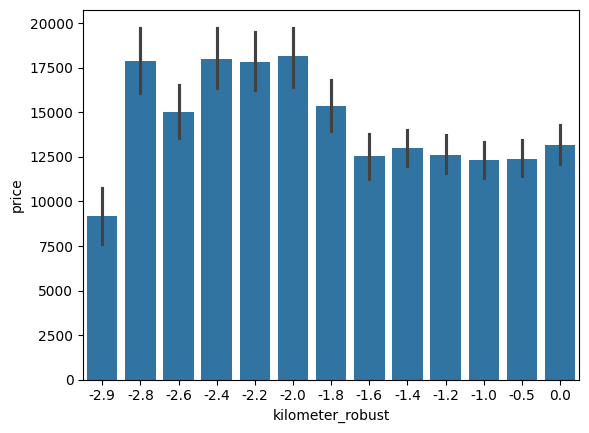

In [91]:
sns.barplot(df_filtrado, x="kilometer_robust", y="price")

- Tenemos aproximadamente 3500 outliers, dado que no tenemos información sobre si se encuentran en la columna de kilometer o powerCV, reemplazaremos por la mediana en cada uno de los casos, dado que reducimos el impacto de eliminar datos, y evitamos la sensibilidad de la media a los valores extremos. No tenemos evidencias para eliminar los datos, y siendo la distribución no normal, sustituiremos con este método.

In [99]:
df_lof.loc[df_filtrado.index, "kilometer_robust"] = 1.6

In [100]:
df_lof.loc[df_filtrado.index, 'powerCV_robust'] = 1.040601

In [102]:
df_lof.describe().T

count         mean          std         min  \
price                 330616.0  5972.944507  6770.233746  500.000000   
monthOfRegistration   330616.0     6.143650     3.339515    1.000000   
kilometer_robust      330616.0    -0.454690     0.803227   -2.900000   
powerCV_robust        330616.0     0.091677     0.929719   -1.366179   
outliers_lof_5_0.01   330616.0     0.983842     0.179038   -1.000000   
outliers_lof_5_0.05   330616.0     0.983842     0.179038   -1.000000   
outliers_lof_5_0.1    330616.0     0.983842     0.179038   -1.000000   
outliers_lof_20_0.01  330616.0     0.980201     0.198007   -1.000000   
outliers_lof_20_0.05  330616.0     0.944389     0.328832   -1.000000   
outliers_lof_20_0.1   330616.0     0.944389     0.328832   -1.000000   
outliers_lof_50_0.01  330616.0     0.980031     0.198844   -1.000000   
outliers_lof_50_0.05  330616.0     0.900120     0.435643   -1.000000   
outliers_lof_50_0.1   330616.0     0.889993     0.455974   -1.000000   

                             25%     50%         75%           max  
price                 1500.00000  3499.0  7800.00000  50000.000000  
monthOfRegistration      3.00000     6.0     9.00000     12.000000  
kilometer_robust        -0.50000     0.0     0.00000      1.600000  
powerCV_robust          -0.53567     0.0     0.46433     14.871109  
outliers_lof_5_0.01      1.00000     1.0     1.00000      1.000000  
outliers_lof_5_0.05      1.00000     1.0     1.00000      1.000000  
outliers_lof_5_0.1       1.00000     1.0     1.00000      1.000000  
outliers_lof_20_0.01     1.00000     1.0     1.00000      1.000000  
outliers_lof_20_0.05     1.00000     1.0     1.00000      1.000000  
outliers_lof_20_0.1      1.00000     1.0     1.00000      1.000000  
outliers_lof_50_0.01     1.00000     1.0     1.00000      1.000000  
outliers_lof_50_0.05     1.00000     1.0     1.00000      1.000000  
outliers_lof_50_0.1      1.00000     1.0     1.00000      1.000000